In [2]:
#Import code from last time
%run NI3-6.ipynb

         Current function value: 0.500931
         Iterations: 100
         Function evaluations: 106
         Gradient evaluations: 106


<Figure size 640x480 with 1 Axes>

         Current function value: 0.381375
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.44281211, 0.70258153, 0.6646853 ],
       [0.49627058, 0.6646853 , 0.38417609],
       [0.47546339, 0.38417609, 0.50844449],
       [0.55155979, 0.50844449, 0.70605062],
       [0.50099435, 0.70605062, 0.62566313],
       [0.44545859, 0.62566313, 0.31006745],
       [0.50571167, 0.31006745, 0.71815185],
       [0.46588904, 0.71815185, 0.58129533],
       [0.46785659, 0.58129533, 0.59084039],
       [0.45300142, 0.59084039, 0.64112187],
       [0.43741172, 0.64112187, 0.70009636],
       [0.3506737 , 0.70009636, 0.61497185],
       [0.36403131, 0.61497185, 0.591378  ]])

In [3]:
testY

array([[0.38417609],
       [0.50844449],
       [0.70605062],
       [0.62566313],
       [0.31006745],
       [0.71815185],
       [0.58129533],
       [0.59084039],
       [0.64112187],
       [0.70009636],
       [0.61497185],
       [0.591378  ],
       [0.32      ]])

In [4]:
trainX

array([[0.14831904, 0.42336055, 0.31155855],
       [0.11211342, 0.31155855, 0.42299539],
       [0.17073406, 0.42299539, 0.42478065],
       [0.2232566 , 0.42478065, 0.32205711],
       [0.24197469, 0.32205711, 0.46046559],
       [0.36573346, 0.46046559, 0.16668864],
       [0.55255899, 0.16668864, 0.40174469],
       [0.37002352, 0.40174469, 0.31647817],
       [0.3325317 , 0.31647817, 0.27086271],
       [0.38788752, 0.27086271, 0.31251205],
       [0.39836394, 0.31251205, 0.36909266],
       [0.2848263 , 0.36909266, 0.20575138],
       [0.18673502, 0.20575138, 0.17619313],
       [0.18269477, 0.17619313, 0.29041944],
       [0.255617  , 0.29041944, 0.24090886],
       [0.23597043, 0.24090886, 0.27408835],
       [0.16413413, 0.27408835, 0.37090835],
       [0.17817663, 0.37090835, 0.05869047],
       [0.1639561 , 0.05869047, 0.40032459],
       [0.13324148, 0.40032459, 0.28999341],
       [0.22639902, 0.28999341, 0.30771415],
       [0.25501386, 0.30771415, 0.42915251],
       [0.

In [5]:
trainY

array([[0.42299539],
       [0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.6646853 ]])

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 3
        self.outputLayerSize = 1
        self.hiddenLayerSize = 6
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

4.5885806496981775e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

         Current function value: 0.013183
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102


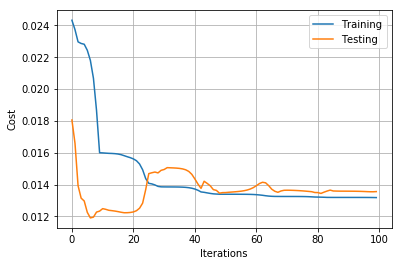

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.02432128]),
 array([0.02373006]),
 array([0.02296323]),
 array([0.0228626]),
 array([0.02281375]),
 array([0.0224372]),
 array([0.02180292]),
 array([0.02067642]),
 array([0.01866627]),
 array([0.0159999]),
 array([0.01599086]),
 array([0.01597623]),
 array([0.01596253]),
 array([0.01595548]),
 array([0.01594257]),
 array([0.01591913]),
 array([0.01587854]),
 array([0.01581565]),
 array([0.01574963]),
 array([0.01568996]),
 array([0.01561192]),
 array([0.0154977]),
 array([0.01529409]),
 array([0.0149312]),
 array([0.01437653]),
 array([0.01407864]),
 array([0.01404293]),
 array([0.0139787]),
 array([0.01388735]),
 array([0.01385801]),
 array([0.01385434]),
 array([0.0138524]),
 array([0.01385188]),
 array([0.01385088]),
 array([0.01384899]),
 array([0.01384541]),
 array([0.01383874]),
 array([0.01382663]),
 array([0.01380566]),
 array([0.01377181]),
 array([0.01372018]),
 array([0.01364244]),
 array([0.01353881]),
 array([0.01351449]),
 array([0.0134789]),
 array([0.01344538

In [17]:
T.testJ

[array([0.01805778]),
 array([0.01659532]),
 array([0.0139286]),
 array([0.01314752]),
 array([0.01297019]),
 array([0.01225716]),
 array([0.01190693]),
 array([0.01195584]),
 array([0.01227241]),
 array([0.01233366]),
 array([0.01248864]),
 array([0.01244639]),
 array([0.01238631]),
 array([0.01236309]),
 array([0.0123361]),
 array([0.01230218]),
 array([0.0122627]),
 array([0.01223183]),
 array([0.01223435]),
 array([0.01224969]),
 array([0.01228272]),
 array([0.01236029]),
 array([0.01251581]),
 array([0.01283482]),
 array([0.01368688]),
 array([0.01468876]),
 array([0.0147431]),
 array([0.0147885]),
 array([0.01473384]),
 array([0.0148943]),
 array([0.01494853]),
 array([0.01506386]),
 array([0.01505443]),
 array([0.01504654]),
 array([0.01503516]),
 array([0.01501682]),
 array([0.01498551]),
 array([0.0149299]),
 array([0.01482856]),
 array([0.01464483]),
 array([0.01435043]),
 array([0.01403239]),
 array([0.01376305]),
 array([0.01420974]),
 array([0.0140746]),
 array([0.013924])

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.0016581530116401072

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.36374897],
       [0.33306375],
       [0.3967438 ],
       [0.39490134],
       [0.39381221],
       [0.42831292],
       [0.44039106],
       [0.44067017],
       [0.38453908],
       [0.39754432],
       [0.42955515],
       [0.3719477 ],
       [0.27141808],
       [0.28274303],
       [0.33945186],
       [0.32124347],
       [0.32749779],
       [0.30184627],
       [0.25840496],
       [0.34493817],
       [0.34280687],
       [0.38653912],
       [0.42765696],
       [0.41188253],
       [0.36792223],
       [0.38283889],
       [0.42842593],
       [0.41536828],
       [0.4057859 ],
       [0.3488699 ],
       [0.48299416],
       [0.47812933],
       [0.48309215],
       [0.55466206],
       [0.56499478],
       [0.58890651],
       [0.59105601],
       [0.56503572],
       [0.62731906],
       [0.68997788],
       [0.66544262],
       [0.6156393 ],
       [0.76748267],
       [0.73874207],
       [0.70115256],
       [0.73958454],
       [0.68547927],
       [0.631

In [21]:
y

array([[0.42299539],
       [0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.6646853 ],
       [0.384

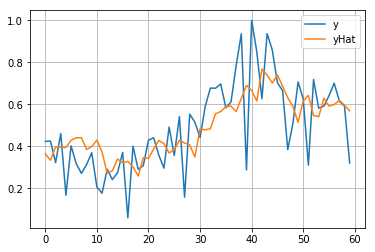

In [22]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [23]:
prediksi=NN.forward(dataprediksi)

In [24]:
prediksi

array([[0.64458444],
       [0.65543026],
       [0.609745  ],
       [0.42263089]])

In [25]:
from sklearn.metrics import mean_squared_error 

In [26]:
Y_true= ([	0.50	]	,
[	0.415539889	]	,
[	0	]	,
[	0.235502358	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.1213145263644831

In [27]:
dataprediksi

array([[0.79538041, 0.591378  , 0.32      ],
       [1.        , 0.32      , 0.5       ],
       [0.70768171, 0.5       , 0.41553989],
       [0.49169532, 0.41553989, 0.        ]])

In [8]:
z=np.array([0.51319034])

In [9]:
y=np.array([0	,	0.235502358	])

In [10]:
a=np.concatenate((z,y))

In [11]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.04617805])

In [12]:
#prediksi 2
c=prediksi
z1=np.array([0.48673204])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

array([0.09579511])

In [13]:
#prediksi 3
c=prediksi
z2=np.array([0.43012934])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

array([0.11613135])

In [14]:
#prediksi 4
c=prediksi
z3=np.array([0.41357631])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

array([0.12420559])

In [15]:
#prediksi 5
c=prediksi
z4=np.array([0.41626853])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

array([0.12498938])

In [16]:
#prediksi 6
c=prediksi
z5=np.array([0.41314695])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi

array([0.12605885])